# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [ ]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import textwrap

### Understanding the structure of the data

In [1]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()

'/content'

In [5]:
cd /content/drive/MyDrive/AI Course - 2024/1 - Python Foundations/EDA/FoodHub

/content/drive/MyDrive/AI Course - 2024/1 - Python Foundations/EDA/FoodHub


In [ ]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

In [ ]:
print(f'There are {df.shape[0]: ,} rows and {df.shape[1]} columns in the dataset.')

There are  1,898 rows and 9 columns in the dataset.


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
nrows = df.shape[0]
ncols = df.shape[1]
ncustomers = df['customer_id'].nunique()
nrestaurants = df['restaurant_name'].nunique()
ncuisines = df['cuisine_type'].nunique()

text = f"There are __~{nrows/ 1000:.0f}K ratings__ in the dataset for __{ncustomers:,} customers__ for __{nrestaurants} restaurants__ in __{ncuisines} cuisine types__."
printmd(text)

There are __~2K ratings__ in the dataset for __1,200 customers__ for __178 restaurants__ in __14 cuisine types__.

In [ ]:
df['cuisine_type'].nunique()

14

In [ ]:
shapedf = pd.DataFrame({'# rows': df.shape[0], '# columns': df.shape[1]}, index=[''])
shapedf['# rows'] = shapedf['# rows'].apply(lambda x: f"{x: ,}")
shapedf

,# rows,# columns
,"1,898",9


In [ ]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
df.shape

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
column_counts_by_dtype = df.dtypes.value_counts()
column_counts_by_dtype

,count
int64,4
object,4
float64,1


In [ ]:
ddict_str = """order_id: Unique ID of the order
customer_id: ID of the customer who ordered the food
restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer
cost_of_the_order: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend
rating: Rating given by the customer out of 5
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food.
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package."""

In [ ]:
description_dict = {D[0]: D[1] for D in [d.split(": ") for d in ddict_str.split('\n')]}

In [ ]:
dtypedf = pd.DataFrame(df.dtypes, columns=['dtype'])
dtypedf['Description'] = dtypedf.index.map(description_dict)
dtypedf.index.name='Column'
print(dtypedf.to_markdown())

| Column                | dtype   | Description                                                                 |
|:----------------------|:--------|:----------------------------------------------------------------------------|
| order_id              | int64   | Unique ID of the order                                                      |
| customer_id           | int64   | ID of the customer who ordered the food                                     |
| restaurant_name       | object  | Name of the restaurant                                                      |
| cuisine_type          | object  | Cuisine ordered by the customer                                             |
| cost_of_the_order     | float64 | Cost of the order                                                           |
| day_of_the_week       | object  | Indicates whether the order is placed on a weekday or weekend               |
| rating                | object  | Rating given by the customer out of 5               

| Column                | dtype   | Description                                                                 |
|:----------------------|:--------|:----------------------------------------------------------------------------|
| order_id              | int64   | Unique ID of the order                                                      |
| customer_id           | int64   | ID of the customer who ordered the food                                     |
| restaurant_name       | object  | Name of the restaurant                                                      |
| cuisine_type          | object  | Cuisine ordered by the customer                                             |
| cost_of_the_order     | float64 | Cost of the order                                                           |
| day_of_the_week       | object  | Indicates whether the order is placed on a weekday or weekend               |
| rating                | object  | Rating given by the customer out of 5                                       |
| food_preparation_time | int64   | Time (in minutes) taken by the restaurant to prepare the food.              |
| delivery_time         | int64   | Time (in minutes) taken by the delivery person to deliver the food package. |

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

,0
Column,
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df.describe(include='all')[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]

Column,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
unique,NaN,NaN,NaN
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the summary statistics of the numerical data
food_preparation_time_stats = df.describe().loc[['min', 'mean', 'max'],'food_preparation_time'] ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)
display(food_preparation_time_stats)
food_preparation_time_stats = food_preparation_time_stats.apply(lambda x: f'{x: .0f}')
food_preparation_time_stats.name = 'Food Preparation Time (min)'
print(food_preparation_time_stats.to_markdown())

,food_preparation_time
min,20.00000
mean,27.37197
max,35.00000


|      |   Food Preparation Time (min) |
|:-----|------------------------------:|
| min  |                            20 |
| mean |                            27 |
| max  |                            35 |


|      |   Food Preparation Time (min) |
|:-----|------------------------------:|
| min  |                            20 |
| mean |                            27 |
| max  |                            35 |

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts() ## Complete the code

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
print(f"About {round(df['rating'].value_counts(normalize=True)['Not given']*100, -1):.0f}% of the orders are not rated.")

About 40% of the orders are not rated.


In [ ]:
df['rating'].value_counts().reindex(['3', '4', '5', 'Not given'])

,count
rating,
3,188
4,386
5,588
Not given,736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique() ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

In [ ]:
def smart_title(text):
    # List of words to keep lowercase
    text = text.replace('_', ' ')
    minor_words = {'of', 'the', 'and', 'in', 'on', 'at', 'for', 'with', 'a', 'an'}

    # Split the text and capitalize appropriately
    words = text.split()
    title_cased = [
        word if word in minor_words and i != 0 else word.capitalize()
        for i, word in enumerate(words)
    ]

    return ' '.join(title_cased)

In [ ]:
def countplot(df, field, figsize=(4,5), color='skyblue', alpha=.7, order=None,
              title=None, rotation=60, thresh=10, palette=None):

  label = smart_title(field)
  n = df[field].nunique()

  if title==None:
    title = f"Count of Each {label}"

  if order==None:
    order = df[field].value_counts().index


  if n > thresh:
    plt.figure(figsize = figsize)

    if palette:
      ax = sns.countplot(data = df,
                        y = field,
                        order=order,
                        alpha=alpha,
                        hue=field,
                        palette=palette
                        );
    else:
      ax = sns.countplot(data = df,
                      y = field,
                      order=order,
                      alpha=alpha,
                      color=color
                      );

    ax.set_ylabel(label)
    ax.set_xlabel("Count")
  else:
    plt.figure(figsize = (figsize[1], figsize[0]))
    if palette:
      ax = sns.countplot(data = df,
                        x = field,
                        order=order,
                        alpha=alpha,
                        palette=palette,
                        hue=field
                        );
    else:
      ax = sns.countplot(data = df,
                        x = field,
                        order=order,
                        alpha=alpha,
                        color=color
                        );
    ax.set_xlabel(label)
    ax.set_ylabel("Count")

    if n >3:
      plt.xticks(rotation = rotation)


  ax.set_title(title)
  sns.despine(top=True, right=True)
  plt.savefig(f"images/countplot_{field}.png", bbox_inches='tight')

def histplot(df, field, figsize=(8,5), color='orange', alpha=.7, kde=False, show_mean_median=True, round_by=2, vline={}):
  label = smart_title(field)
  plt.figure(figsize=figsize)
  sns.histplot(data=df, x=field, color=color, alpha=alpha, edgecolor=None, kde=kde)

  if show_mean_median:
    mean = np.mean(df[field])
    median = np.median(df[field])

    # Plot mean and median lines
    plt.axvline(x = mean, color='blue', linestyle='--', linewidth=.5, label=f'Mean: {round(mean, round_by)}')
    plt.axvline(x = median, color='green', linestyle='-', linewidth=.5, label=f'Median: {round(median, round_by)}')
    plt.legend(frameon=False)

  if vline:
      plt.axvline(**vline)
      plt.legend(frameon=False)

  # Set labels and title
  plt.xlabel(label)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {label}")
  sns.despine(top=True, right=True)
  plt.savefig(f"images/histplot_{field}.png", bbox_inches='tight');


def boxplot(df, field, figsize=(8,2), color='orange', alpha=.7):
  label = smart_title(field)
  plt.figure(figsize=figsize)
  sns.boxplot(data=df, x=field, color=color, boxprops=dict(alpha=alpha), linewidth=0.5)
  # Set labels and title
  plt.xlabel(label)
  plt.title(f"Boxplot of {label}")
  # Remove top and right spines
  sns.despine(top=True, right=True)
  plt.savefig(f"images/boxplot_{field}.png", bbox_inches='tight')


def violinplot(df, field, figsize=(8,3), color='orange', alpha=.7):
  label = smart_title(field)
  plt.figure(figsize=figsize)

  sns.violinplot(data=df, x=field, color=color, inner='box', linewidth=1.5, alpha=alpha)

  # Set labels and title
  plt.xlabel(label)
  plt.ylabel("Density")
  plt.title(f"Violin Plot of {label}")

  # Remove top and right spines
  sns.despine(top=True, right=True)
  plt.savefig(f"images/violinplot_{field}.png", bbox_inches='tight')

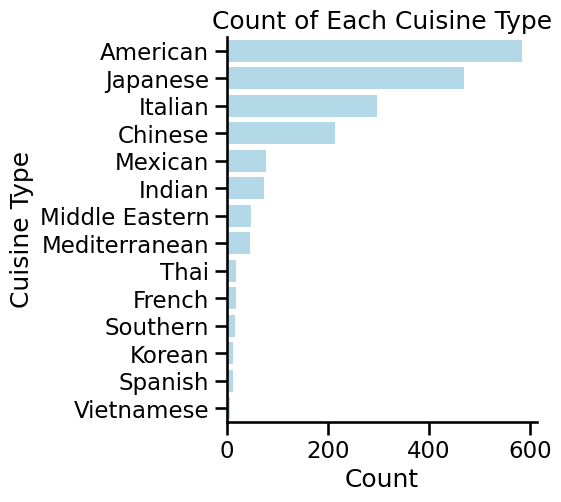

In [ ]:
field = 'cuisine_type'
countplot(df, field, color='skyblue')

#### Cost of the order

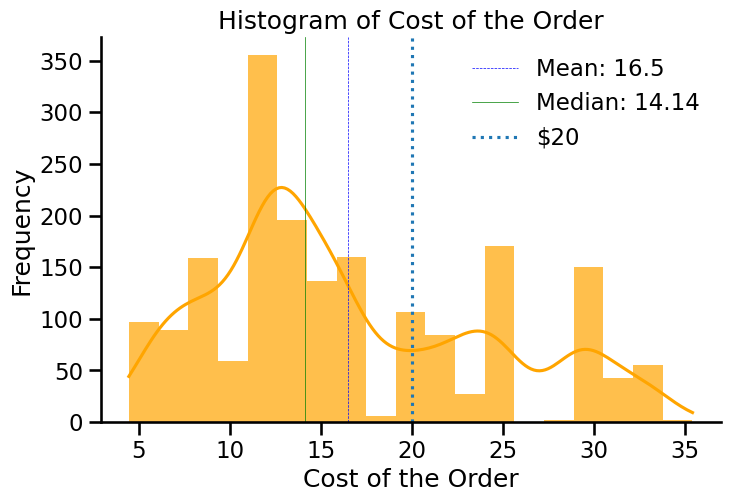

In [ ]:
vline = {'x': 20, 'label': '$20', 'linestyle': ':'}
histplot(df, 'cost_of_the_order', kde=True, vline=vline)

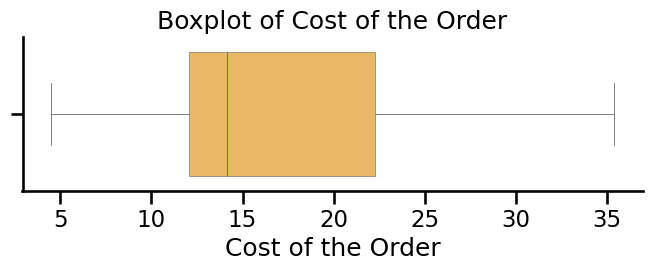

In [ ]:
boxplot(df, 'cost_of_the_order')

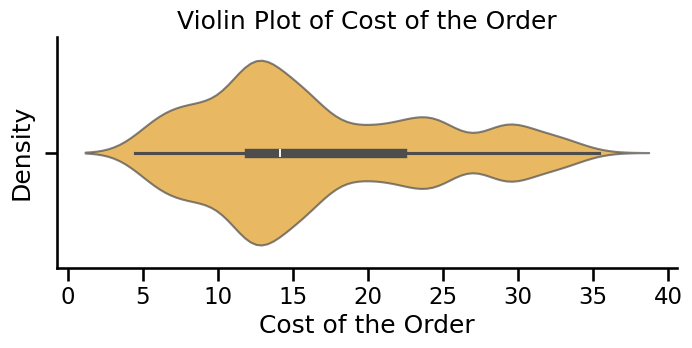

In [ ]:
violinplot(df, 'cost_of_the_order')

In [ ]:
# sns.histplot(data=df,
#              x='cost_of_the_order') ## Histogram for the cost of order
# plt.show()
# sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
# plt.show()

#### Day of the week

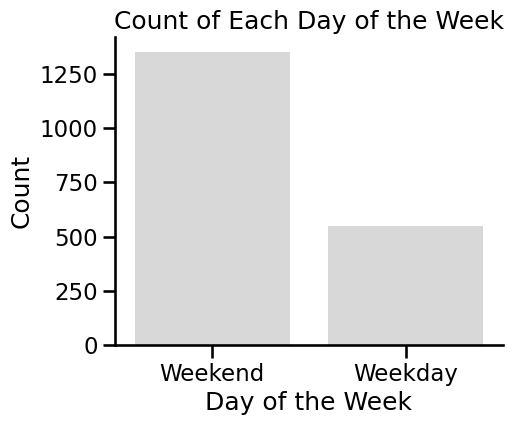

In [ ]:
countplot(df, 'day_of_the_week', color='gray', alpha=.3)

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
# sns.countplot(data = df, x = 'day_of_the_week'); ## Complete the code to plot a bar graph for 'day_of_the_week' column

In [ ]:
week_orders = df['day_of_the_week'].value_counts(normalize=True)*100

printmd(f"Around {round(week_orders['Weekday'], -1): .0f}% of orders are placed on __weekdays__ and {round(week_orders['Weekend'], -1):.0f}% on __weekends__.")

Around  30% of orders are placed on __weekdays__ and 70% on __weekends__.

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

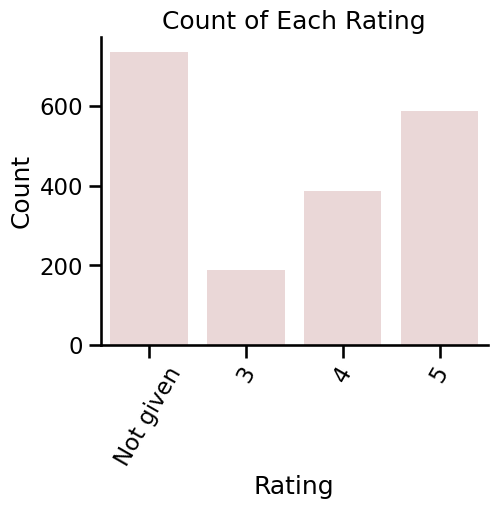

In [ ]:
countplot(df, 'rating', order=['Not given', '3', '4', '5'], color='brown', alpha=.2)

In [ ]:
# sns.countplot(data = df, x = 'rating'); ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

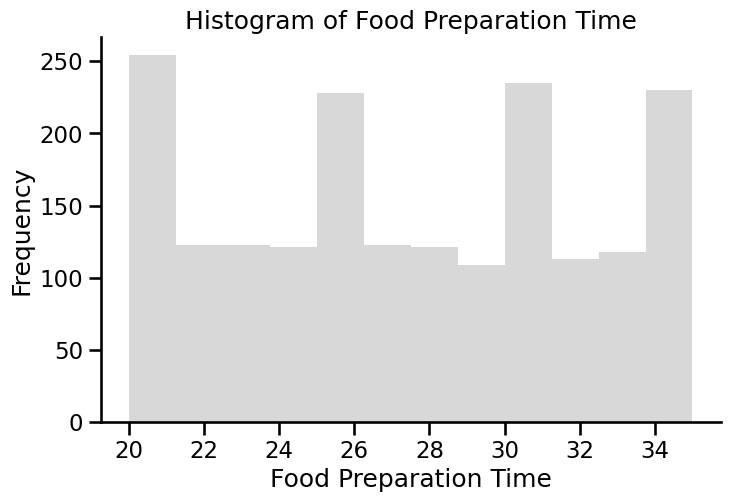

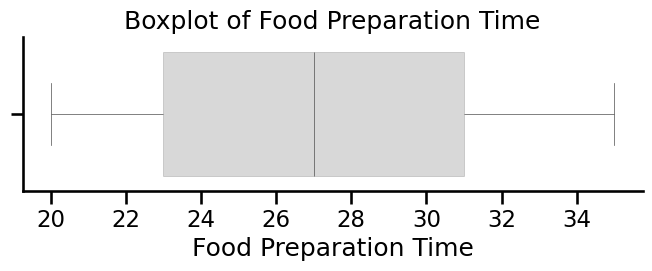

In [ ]:
histplot(df, 'food_preparation_time', kde=False, show_mean_median=False, color='gray', alpha=.3)
boxplot(df, 'food_preparation_time', color='gray', alpha=.3)

In [ ]:
# sns.histplot(data=df,x='food_preparation_time'); ## Complete the code to plot the histogram for the food preparation time
# plt.show()
# sns.boxplot(data=df,x='food_preparation_time'); ## Complete the code to plot the boxplot for the cost of food preparation time
# plt.show()

#### Delivery time

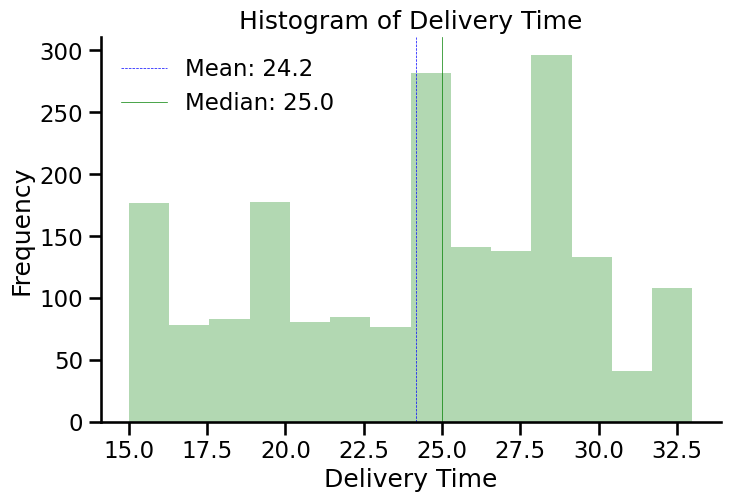

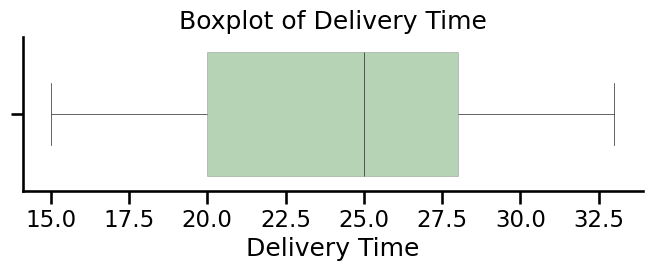

In [ ]:
histplot(df, 'delivery_time', kde=False, show_mean_median=True, color='green', alpha=.3, round_by=1)
boxplot(df, 'delivery_time', color='green', alpha=.3)

In [ ]:
delivery_time_stats = df.describe().loc[['min', 'mean', 'max'],'delivery_time'] ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)
display(delivery_time_stats)
delivery_time_stats = delivery_time_stats.apply(lambda x: f'{x: .0f}')
delivery_time_stats.name = 'Delivery Time (min)'
print(delivery_time_stats.to_markdown())

,delivery_time
min,15.000000
mean,24.161749
max,33.000000


|      |   Delivery Time (min) |
|:-----|----------------------:|
| min  |                    15 |
| mean |                    24 |
| max  |                    33 |


|      |   Delivery Time (min) |
|:-----|----------------------:|
| min  |                    15 |
| mean |                    24 |
| max  |                    33 |

In [ ]:
# sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
# plt.show()
# sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
# plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()[:5]

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
top5 = df['restaurant_name'].value_counts()[:5].index.tolist()

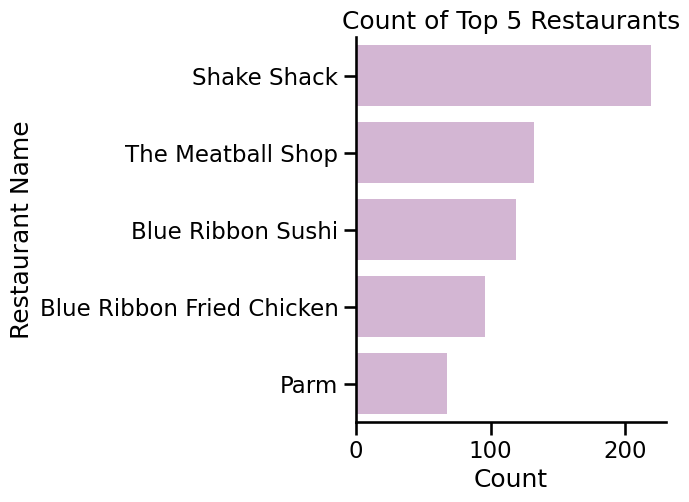

In [ ]:
countplot(df[df['restaurant_name'].isin(top5)], 'restaurant_name', alpha=.3,
          title='Count of Top 5 Restaurants', color='purple', thresh=4)

In [ ]:
print('\n'.join(df['restaurant_name'].value_counts(normalize=True)[:5].index))

Shake Shack
The Meatball Shop
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
Parm


### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts(normalize=True)[:1]*100## Complete the code to check unique values for the cuisine type on weekend

,proportion
cuisine_type,
American,30.717987


In [ ]:
# Get most popular cuisine on weekends
df_weekday = df[df['day_of_the_week'] == 'Weekday']
df_weekday['cuisine_type'].value_counts(normalize=True)[:1]*100

,proportion
cuisine_type,
American,30.895795


### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 0), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.0 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

In [ ]:
# Relationship between cost of the order and cuisine type
def boxplot_multi(df, cat, num, palette='PuBu', figsize=(8,7), alpha=.7,
                  color=None, return_colors=False):
  plt.figure(figsize=figsize)
  # order = df[cat].value_counts().index
  order = (df.groupby(cat)[num].agg(['median', 'mean'])
            .sort_values(by=['median', 'mean'],
                         ascending=[False, False]).index)

  if color:
    ax = sns.boxplot(data = df, y = cat, x = num,
                    boxprops=dict(alpha=alpha), linewidth=0.5,
                    color= color,
                      # palette = palette,
                    #  hue = None,
                    order = order)
  else:
    ax = sns.boxplot(data = df, y = cat, x = num,
                    boxprops=dict(alpha=alpha), linewidth=0.5,
                    palette = palette,
                    hue = cat,
                    order = order)




  ax.set_xlabel(smart_title(num))
  ax.set_ylabel(smart_title(cat))


  ax.set_title(f'Boxplot of {smart_title(num)} for Various {smart_title(cat)}s', )
  sns.despine(top=True, right=True)
  plt.savefig(f"images/boxplot_{cat}_{num}.png", bbox_inches='tight')
  if return_colors:
    colors = {df[cat].unique()[i]: patch.get_facecolor() for i, patch in enumerate(ax.patches)}
    return colors

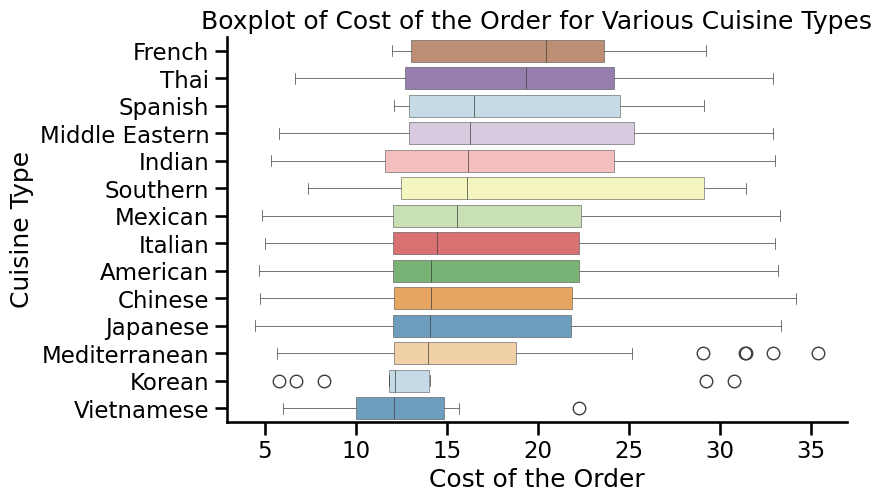

In [ ]:
cat = 'cuisine_type'
num = "cost_of_the_order"
palette_colors = boxplot_multi(df, cat, num, palette='Paired', figsize=(8,5), alpha=.7, return_colors=True)

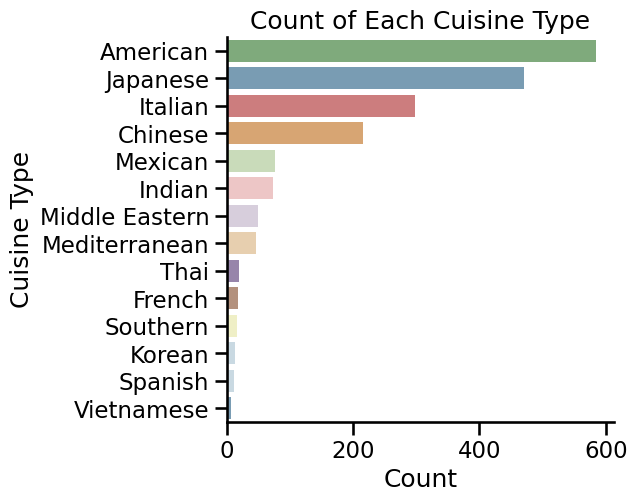

In [ ]:
countplot(df, field, palette=palette_colors, figsize=(5,5))

In [ ]:
# # Relationship between cost of the order and cuisine type
# plt.figure(figsize=(15,7))
# sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
# plt.xticks(rotation = 60)
# plt.show()

#### Cuisine vs Food Preparation time

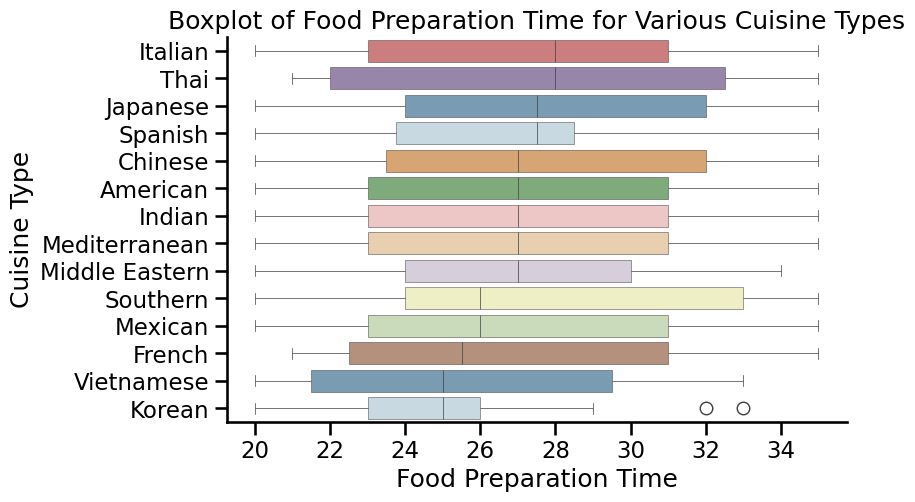

In [ ]:
cat = 'cuisine_type'
num = "food_preparation_time"
boxplot_multi(df, cat, num, palette=palette_colors, figsize=(8,5), alpha=.7)

In [ ]:
# # Relationship between food preparation time and cuisine type
# plt.figure(figsize=(15,7))
# sns.boxplot(data = df, y='cuisine_type', x='food_preparation_time', hue='cuisine_type')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
# plt.xticks(rotation = 60)
# plt.show()

#### Day of the Week vs Delivery time

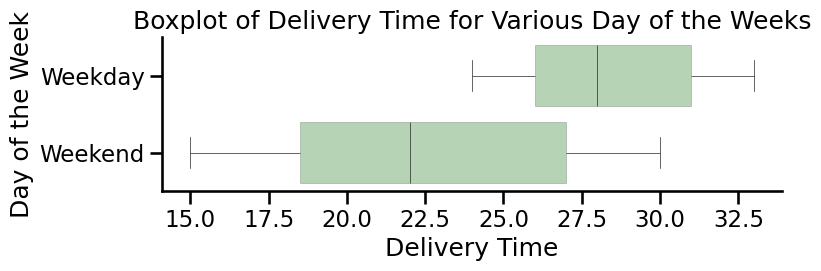

In [ ]:
cat = 'day_of_the_week'
num = "delivery_time"
boxplot_multi(df, cat, num, color='green', figsize=(8,2), alpha=.3)

In [ ]:
# # Relationship between day of the week and delivery time
# plt.figure(figsize=(15,7))
# sns.boxplot(data = df, y='day_of_the_week', x='delivery_time')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
# plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
revenue_restaurant = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)
revenue_restaurant.name = 'Revenue'
total_revenue = revenue_restaurant.sum()
print(f'The total revenue is ${total_revenue:,.0f}.')
revenue_restaurant.apply(lambda x: f'${x:.0f}').head(10)

The total revenue is $31,315.


,Revenue
restaurant_name,
Shake Shack,$3580
The Meatball Shop,$2145
Blue Ribbon Sushi,$1904
Blue Ribbon Fried Chicken,$1662
Parm,$1113
RedFarm Broadway,$965
RedFarm Hudson,$921
TAO,$834
Han Dynasty,$755


In [ ]:
total_revenue = revenue_restaurant.sum()
print(f'The total revenue is ${total_revenue:,.0f}.')

The total revenue is $31,315.


#### Rating vs Delivery time

In [ ]:
def pointplot(df, cat, num, figsize=(8, 5), order=None, estimator='mean',
              linewidth=3,
              color='blue', alpha=.7):
  label = smart_title(field)
  if order==None:
    order = df[cat].value_counts().index
  plt.figure(figsize=figsize)
  ax = sns.pointplot(data = df, x = cat, y = num, order=order,
                     linewidth=linewidth,
                     estimator=estimator, color=color, alpha=alpha)
  plt.xlabel(smart_title(cat))
  plt.ylabel(smart_title(num))
  plt.title(f"{estimator.title()} {smart_title(num)} for Various {smart_title(cat)}s")
  sns.despine(top=True, right=True)
  plt.savefig(f"images/pointplot_{cat}_{num}_{estimator}.png", bbox_inches='tight');

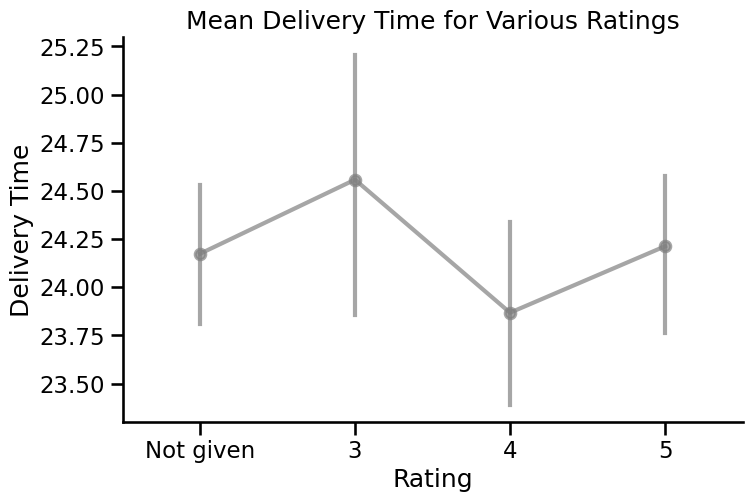

In [ ]:
cat = 'rating'
num = 'delivery_time'

pointplot(df, cat, num, figsize=(8, 5), order=['Not given', '3', '4', '5'], color='gray',
          estimator='mean')

In [ ]:
# # Relationship between rating and delivery time
# plt.figure(figsize=(15, 7))
# sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
# plt.show()

#### Rating vs Food preparation time

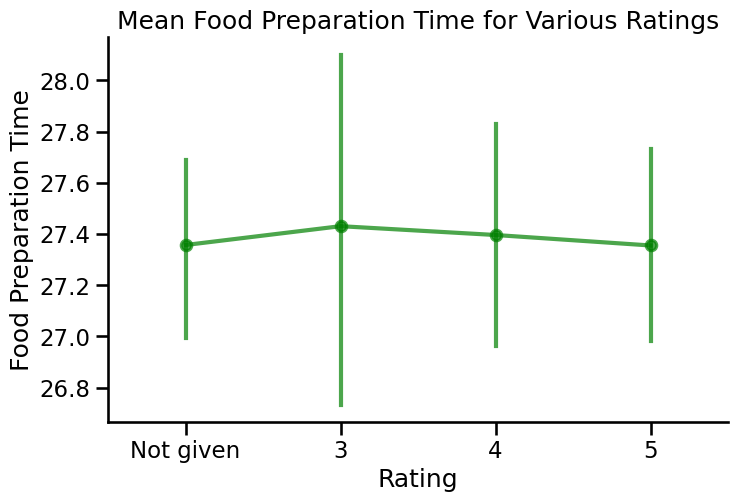

In [ ]:
cat = 'rating'
num = 'food_preparation_time'

pointplot(df, cat, num, figsize=(8, 5), order=['Not given', '3', '4', '5'], color='green',
          estimator='mean')

In [ ]:
# # Relationship between rating and food preparation time
# plt.figure(figsize=(15, 7))
# sns.pointplot(data=df, x='rating', y='food_preparation_time')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
# plt.show()

#### Rating vs Cost of the order

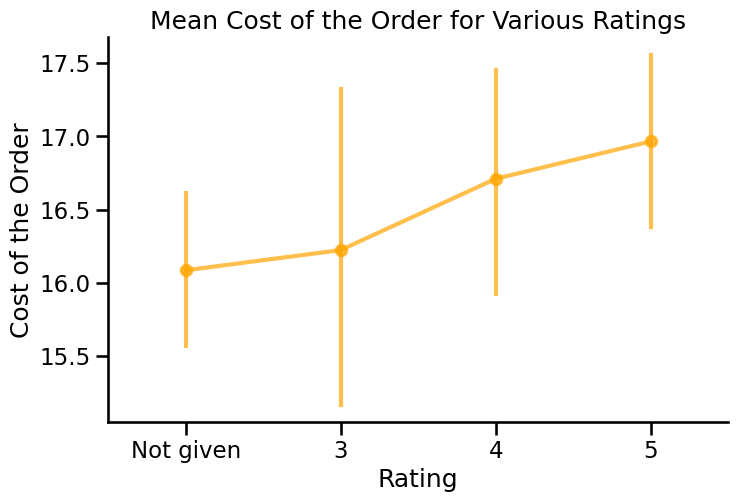

In [ ]:
cat = 'rating'
num = 'cost_of_the_order'

pointplot(df, cat, num, figsize=(8, 5), order=['Not given', '3', '4', '5'], color='orange',
          estimator='mean')

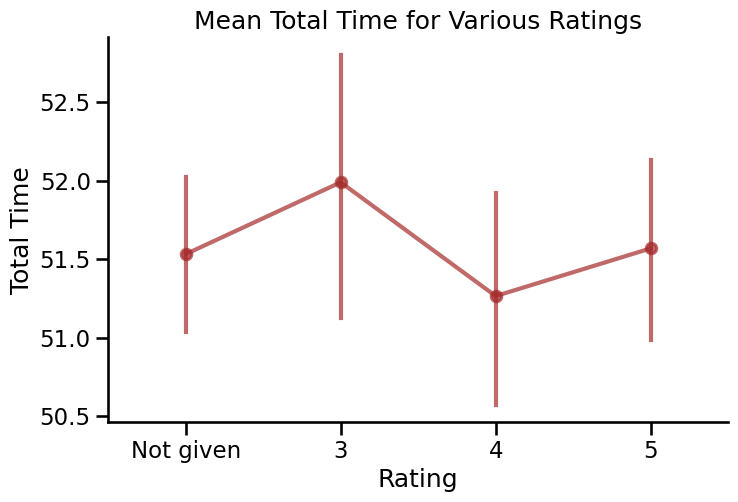

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
cat = 'rating'
num = 'total_time'

pointplot(df, cat, num, figsize=(8, 5), order=['Not given', '3', '4', '5'], color='brown')

In [ ]:
# # Relationship between rating and cost of the order
# plt.figure(figsize=(15, 7))
# sns.pointplot(data=df, x= 'rating', y='cost_of_the_order')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
# plt.show()

#### Correlation among variables

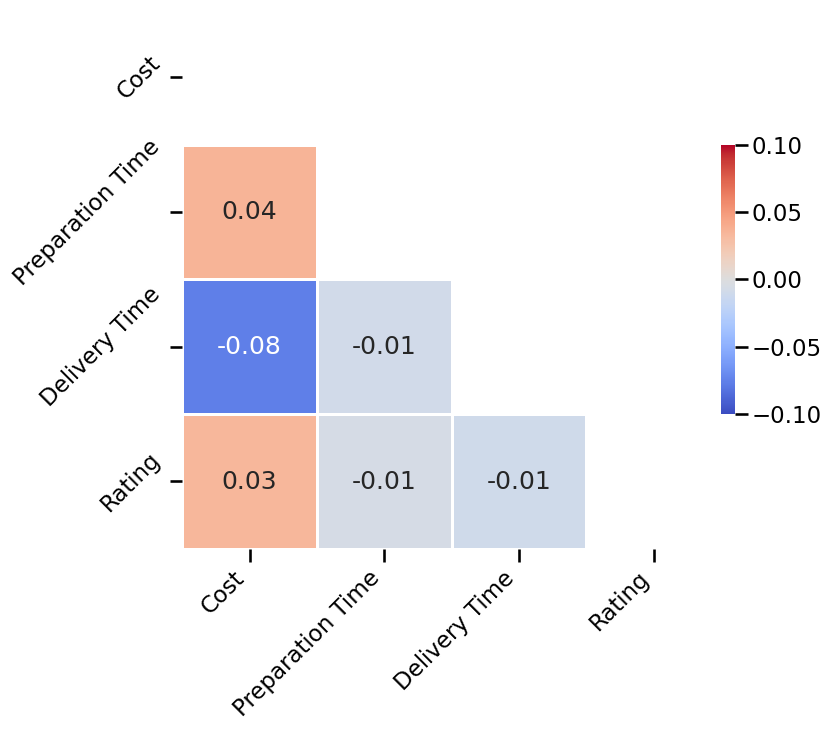

In [ ]:
def heatmap(df, col_list, figsize=(15, 7)):
  plt.figure(figsize=figsize)
  corr = df[col_list].corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-.1, vmax=.1, fmt=".2f",
              cbar_kws={"shrink": 0.5, 'pad': 0},
              linewidth=2,
              square = True,
              cmap="coolwarm")
  ax.set(xlabel="", ylabel="")
  # ax.xaxis.tick_top()
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
  # plt.title('Correlation Matrix')
  plt.savefig(f"images/heatmap.png", bbox_inches='tight');


dfcopy = df.copy()
col_names = {
    'Cost': 'cost_of_the_order',
    'Preparation Time': 'food_preparation_time',
    'Delivery Time': 'delivery_time'
}
col_list = list(col_names.keys())

for k, v in col_names.items():
  dfcopy[k] = dfcopy[v]

dfcopy = dfcopy[dfcopy['rating']!='Not given']
dfcopy['Rating'] = dfcopy['rating'].astype(int)
col_list.append('Rating')

heatmap(dfcopy, col_list, figsize=(15, 7))

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
df_rated_count_mean = df_rated.groupby('restaurant_name')['rating'].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=[False, False])
display(df_rated_count_mean.head())
df_offer = df_rated_count_mean[(df_rated_count_mean['count']>50) & (df_rated_count_mean['mean']>4)]
df_offer.loc[:, 'mean'] = df_offer['mean'].apply(lambda x: float(f'{x:.1f}'))
df_offer.index.name = 'Restaurant'
df_offer

,count,mean
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125
RedFarm Broadway,41,4.243902


,count,mean
Restaurant,,
Shake Shack,133,4.3
The Meatball Shop,84,4.5
Blue Ribbon Sushi,73,4.2
Blue Ribbon Fried Chicken,64,4.3


In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
display(df_rating_count.head())
print(df_rating_count.shape)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


(156, 2)


In [ ]:
df_count_50 = df_rating_count[df_rating_count['rating']>50]
display(df_count_50)

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()


# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

display(df_avg_rating_greater_than_4)
df_avg_rating_greater_than_4['rating'] = df_avg_rating_greater_than_4['rating'].apply(lambda x: f'{x:.1f}')
display(df_avg_rating_greater_than_4)

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


,restaurant_name,rating
0,The Meatball Shop,4.5
1,Blue Ribbon Fried Chicken,4.3
2,Shake Shack,4.3
3,Blue Ribbon Sushi,4.2


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

Column,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,Cost,Preparation Time,Delivery Time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,30.75,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,12.08,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,12.23,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,29.20,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,11.59,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


In [ ]:
print(f'The net revenue is around ${total_rev:,.2f}.')

The net revenue is around $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
over_60_min = df[df['total_time']>60]
p=over_60_min.shape[0]/df.shape[0]*100


print(f'{p: .1f}% of orders take more than 60 min to get delivered from the time the order is placed.')

 10.5% of orders take more than 60 min to get delivered from the time the order is placed.


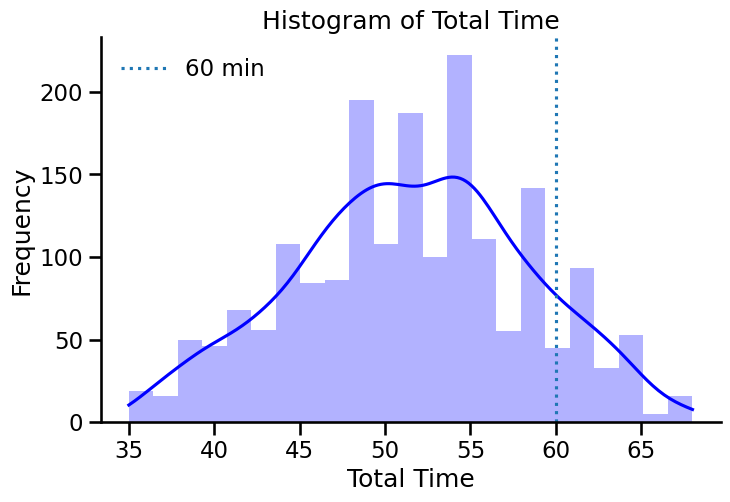

In [ ]:
vline = {'x': 60, 'label': '60 min', 'linestyle': ':'}

histplot(df, 'total_time', kde=True, show_mean_median=False, color='blue', alpha=.3, round_by=1, vline=vline)

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
week_revenue = (df.groupby('day_of_the_week')['cost_of_the_order']
 .sum().apply(lambda x: f'${x:,.0f}')
 .to_frame()
 .rename(columns={'cost_of_the_order': 'Revenue'})
)
display(week_revenue)

total = df['cost_of_the_order'].sum().sum()
(df.groupby('day_of_the_week')['cost_of_the_order']
 .sum()/total*100).loc['Weekend'].round(0)

,Revenue
day_of_the_week,
Weekday,"$8,922"
Weekend,"$22,393"


72.0

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it


print('The mean delivery time on weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')



The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


In [ ]:
df['rating_given']=False

In [ ]:
df.loc[df['rating']!='Not given', 'rating_given'] = True

In [ ]:
df['rating_given'].value_counts(normalize=True)


,proportion
rating_given,
True,0.612223
False,0.387777


In [ ]:
cuisine_proportions = (
    df.groupby('rating_given')['cuisine_type']
    .value_counts(normalize=True)
    .reset_index(name='Proportion')
)

# Pivot the data to compare proportions side-by-side for True and False
cuisine_comparison = cuisine_proportions.pivot(index='cuisine_type', columns='rating_given', values='Proportion').fillna(0)

# Rename columns for clarity
cuisine_comparison.columns = ['Not Given', 'Given']

# Calculate the difference between Given and Not Given proportions if desired
cuisine_comparison['Difference'] = cuisine_comparison['Not Given']-cuisine_comparison['Given']
cuisine_comparison.sort_values(by='Difference', ascending=False, inplace=True)
display(cuisine_comparison)

,Not Given,Given,Difference
cuisine_type,,,
Japanese,0.267663,0.234940,0.032723
Italian,0.171196,0.148021,0.023175
Thai,0.013587,0.007745,0.005842
Spanish,0.008152,0.005164,0.002989
French,0.010870,0.008606,0.002264
Vietnamese,0.002717,0.004303,-0.001586
Mexican,0.039402,0.041308,-0.001906
Korean,0.005435,0.007745,-0.002310
Chinese,0.111413,0.114458,-0.003045


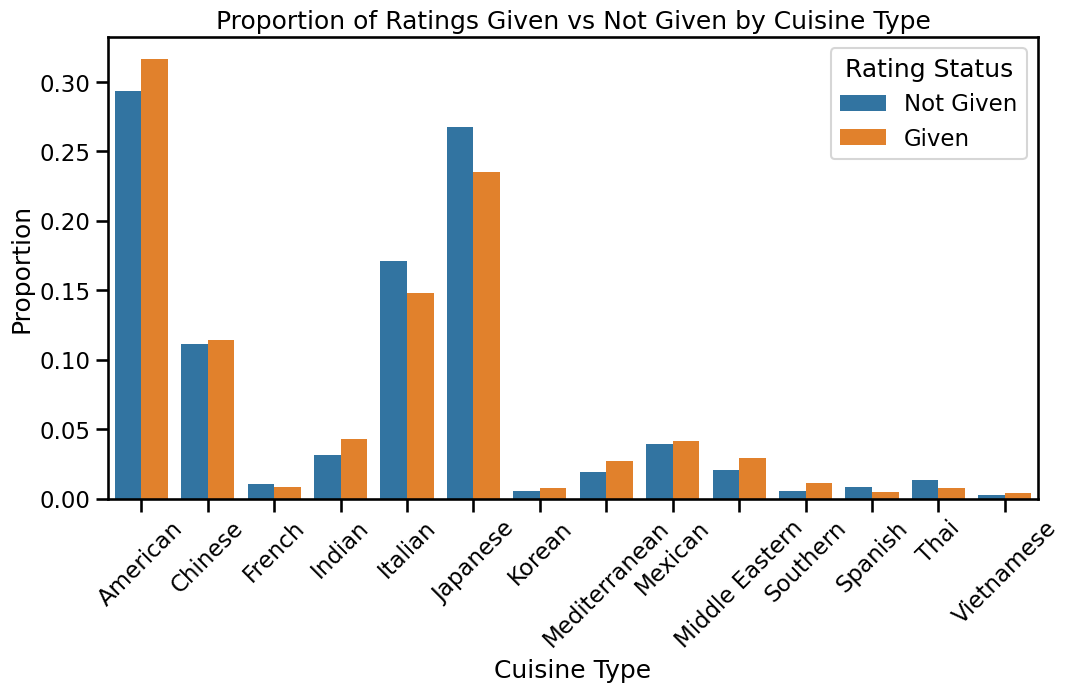

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index to prepare for melting
cuisine_comparison_reset = cuisine_comparison.reset_index()

# Melt the DataFrame to long format for seaborn
cuisine_melted = cuisine_comparison_reset.melt(id_vars='cuisine_type', value_vars=['Not Given', 'Given'],
                                               var_name='Rating Status', value_name='Proportion')

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=cuisine_melted, x='cuisine_type', y='Proportion', hue='Rating Status')

# Customizing the plot
plt.xlabel('Cuisine Type')
plt.ylabel('Proportion')
plt.title('Proportion of Ratings Given vs Not Given by Cuisine Type')
plt.xticks(rotation=45)
plt.legend(title='Rating Status')
plt.show()


In [ ]:
top_5_cuisines = (
    df.groupby('rating_given')['cuisine_type']
    .value_counts(normalize=True)
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x.head(5))
    # .reset_index(name='Proportion')
)
top_5_cuisines

rating_given  cuisine_type
False         American        0.293478
              Japanese        0.267663
              Italian         0.171196
              Chinese         0.111413
              Mexican         0.039402
True          American        0.316695
              Japanese        0.234940
              Italian         0.148021
              Chinese         0.114458
              Indian          0.043029
Name: proportion, dtype: float64

In [ ]:
cuisine_comparison.sort_values(by='Difference', ascending=False)

,Not Given,Given,Difference
cuisine_type,,,
Japanese,0.267663,0.234940,0.032723
Italian,0.171196,0.148021,0.023175
Thai,0.013587,0.007745,0.005842
Spanish,0.008152,0.005164,0.002989
French,0.010870,0.008606,0.002264
Vietnamese,0.002717,0.004303,-0.001586
Mexican,0.039402,0.041308,-0.001906
Korean,0.005435,0.007745,-0.002310
Chinese,0.111413,0.114458,-0.003045


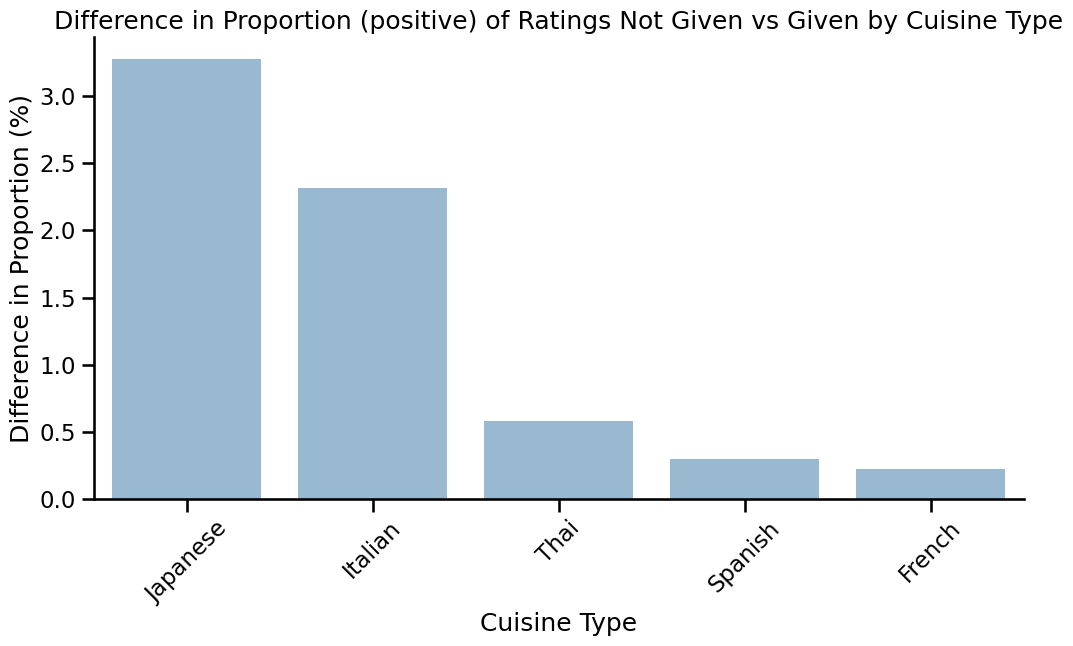

In [ ]:
import seaborn as sns

positive = cuisine_comparison[cuisine_comparison['Difference']>0]
positive = positive * 100
# Reset the index to make cuisine_type a column
positive_reset = positive.reset_index()

# Plotting the Difference column with seaborn
plt.figure(figsize=(12, 6))

sns.barplot(data=positive_reset, x='cuisine_type', y='Difference', alpha=.5)

# Customizing the plot
plt.xlabel('Cuisine Type')
plt.ylabel('Difference in Proportion (%)')
plt.title('Difference in Proportion (positive) of Ratings Not Given vs Given by Cuisine Type')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.savefig(f"images/barplot_rating_not_given_difference.png", bbox_inches='tight')


In [ ]:
df.groupby('rating_given')['cuisine_type'].value_counts(normalize=True)

rating_given  cuisine_type  
False         American          0.293478
              Japanese          0.267663
              Italian           0.171196
              Chinese           0.111413
              Mexican           0.039402
              Indian            0.031250
              Middle Eastern    0.020380
              Mediterranean     0.019022
              Thai              0.013587
              French            0.010870
              Spanish           0.008152
              Korean            0.005435
              Southern          0.005435
              Vietnamese        0.002717
True          American          0.316695
              Japanese          0.234940
              Italian           0.148021
              Chinese           0.114458
              Indian            0.043029
              Mexican           0.041308
              Middle Eastern    0.029260
              Mediterranean     0.027539
              Southern          0.011188
              French            0.008606
              Korean            0.007745
              Thai              0.007745
              Spanish           0.005164
              Vietnamese        0.004303
Name: proportion, dtype: float64

In [ ]:
df.groupby('rating_given')['delivery_time'].mean()

,delivery_time
rating_given,
False,24.173913
True,24.154045


In [ ]:
df.groupby('rating_given')['cuisine_type'].count()

,cuisine_type
rating_given,
False,736
True,1162


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---